# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of all absolute PLQY data.
__

_Version 05.11.2021 in Python 3_

_Change log:_  


In [9]:
import os
from os import getcwd, listdir
import pandas as pd
import matplotlib.pyplot as plt
import thot
from thot import ThotProject
from importlib import reload

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc
#from FTE_analysis_libraries.General import f1240, Vsq, V_loss, QFLS

reload(spc)
reload(lqy)
pass

In [4]:
# Initializes Thot project
db = ThotProject( dev_root = '../shuai' )

In [5]:
samples = db.find_assets({'type' : 'absolute PL spectrum'})
for idx, sample in enumerate(samples):
    print(f'{idx:2}: {sample.name}')    

 0: cppa-1_absolute PL spectrum
 1: cppa-4_absolute PL spectrum
 2: control_absolute PL spectrum
 3: cppa-3_absolute PL spectrum
 4: cppa-5_absolute PL spectrum
 5: cppa-2_absolute PL spectrum


In [20]:
#Select samples and change order
do_this_step = True
if do_this_step:
    order = [ 2, 0, 5, 3, 1, 4]
    samples_new = [samples[order[idx]] for idx in range(len(order))]
    for idx, sample in enumerate(samples_new):
        print(f'{idx:2}: {sample.name}')
    do_this_step = False
else:
    samples_new = samples

 0: control_absolute PL spectrum
 1: cppa-1_absolute PL spectrum
 2: cppa-2_absolute PL spectrum
 3: cppa-3_absolute PL spectrum
 4: cppa-4_absolute PL spectrum
 5: cppa-5_absolute PL spectrum


In [21]:
samples = samples_new
def load_spectrum(asset):
    return spc.PEL_spectrum.load(os.path.dirname(asset.file), FN = os.path.basename(asset.file)+'.csv', take_quants_and_units_from_file = True)
sa = []
for idx, sample in enumerate(samples):
    sa.append(load_spectrum(sample))
    print(f'{idx:2}: {sample.name}')

 0: control_absolute PL spectrum
 1: cppa-1_absolute PL spectrum
 2: cppa-2_absolute PL spectrum
 3: cppa-3_absolute PL spectrum
 4: cppa-4_absolute PL spectrum
 5: cppa-5_absolute PL spectrum


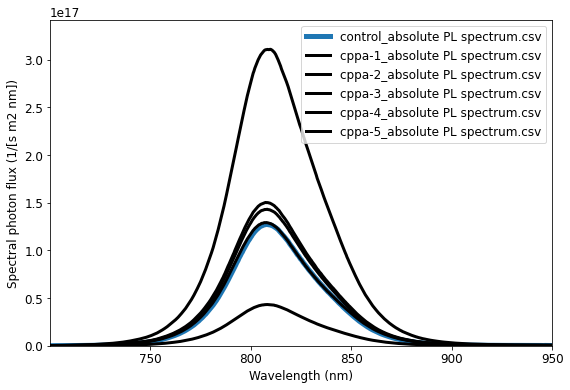

In [22]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
#allPL.sa[1].plotstyle = dict(color = colors[0], linewidth = 5, linestyle = '-')
#allPL.sa[2].plotstyle = dict(color = colors[1], linewidth = 5, linestyle = '-')
#allPL.sa[3].plotstyle = dict(color = colors[1], linewidth = 5, linestyle = '-')
#allPL.sa[4].plotstyle = dict(color = colors[2], linewidth = 5, linestyle = '-')
#allPL.sa[5].plotstyle = dict(color = colors[2], linewidth = 5, linestyle = '-')
#allPL.sa[6].plotstyle = dict(color = colors[3], linewidth = 5, linestyle = '-')
#allPL.sa[7].plotstyle = dict(color = colors[3], linewidth = 5, linestyle = '-')

all_graph = allPL.plot(bottom = 0, plotstyle = 'individual', return_fig = True, show_plot = False)
lqy.add_graph(db, 'all_abolute_PL_spectra.png', all_graph)
# plt.close( all_graph )


In [23]:
names = []
A_arr = []
PLQY_arr = []
peak_arr = []
Eg_arr = []
Vsq_arr = []
dV_arr = []
QFLS_arr = []
adj_fac_arr = []
fs_absint_fac_arr = []
for sample in samples:
    #print(sample.name.split('_absolute')[0])
    sm = sample.metadata
    #print(sm)
    names.append(sample.name.split('_absolute')[0])
    A_arr.append(sm['A'])
    PLQY_arr.append(sm['PLQY'])
    peak_arr.append(sm['Peak'])
    Eg_arr.append(sm['Eg'])
    Vsq_arr.append(sm['Vsq'])
    dV_arr.append(sm['dV'])
    QFLS_arr.append(sm['QFLS'])
    adj_fac_arr.append(sm['adj_fac'])
    fs_absint_fac_arr.append(sm['fs_absint_factor'])    

In [24]:
# Save PLQY data
do_this_step = True

if do_this_step:

    df = pd.DataFrame({'Sample' : names, 'A' : A_arr, 'PLQY' : PLQY_arr, 'PL_peak (nm)' : peak_arr, 'Eg (eV)' : Eg_arr, 'Vsq (V)' : Vsq_arr, 'delta V (V)': dV_arr, 'QFLS/q (V)' : QFLS_arr, 'fs-inb adjustment factor' : adj_fac_arr, 'fs-absolute intensity factor' : fs_absint_fac_arr})

    directory = os.path.dirname(samples[0].file) 
    FN = 'PLQY.csv'
    #if save_ok(join(directory, FN)):
    #    df.to_csv(join(directory, FN), header = True, index = False)
        
    asset_prop = dict(name = 'csv_'+FN, type = 'csv', file = FN)
    asset_filepath = db.add_asset(asset_prop)
    df.to_csv(asset_filepath, header = True, index = False)
    do_this_step = False